In [1]:
#Imports and renderers
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
#Read file and tidy up data.
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data')

df.columns = ['Wife age', 'Wife education', 'Husband education', 'Num children', 'Wife religion', 'Wife working', 'Husband occupation', 'SOL index', 'Media exposure', 'Contraception']

df['Wife religion']= df['Wife religion'].replace(0, "Non-Islam")
df['Wife religion']= df['Wife religion'].replace(1, "Islam")

df['Wife working']= df['Wife working'].replace(0, "Yes")
df['Wife working']= df['Wife working'].replace(1, "No")

df['Media exposure']= df['Media exposure'].replace(0, "Good")
df['Media exposure']= df['Media exposure'].replace(1, "Not good")

df["Contraception"]= df["Contraception"].replace(1, "No-use") 
df["Contraception"]= df["Contraception"].replace(2, "Long-term") 
df["Contraception"]= df["Contraception"].replace(3, "Short-term") 

print(df.shape)
df.head(10)

(1472, 10)


,Wife age,Wife education,Husband education,Num children,Wife religion,Wife working,Husband occupation,SOL index,Media exposure,Contraception
0,45,1,3,10,Islam,No,3,4,Good,No-use
1,43,2,3,7,Islam,No,3,4,Good,No-use
2,42,3,2,9,Islam,No,3,3,Good,No-use
3,36,3,3,8,Islam,No,3,2,Good,No-use
4,19,4,4,0,Islam,No,3,3,Good,No-use
5,38,2,3,6,Islam,No,3,2,Good,No-use
6,21,3,3,1,Islam,Yes,3,2,Good,No-use
7,27,2,3,3,Islam,No,3,4,Good,No-use
8,45,1,1,8,Islam,No,2,2,Not good,No-use
9,38,1,3,2,Islam,Yes,3,3,Not good,No-use


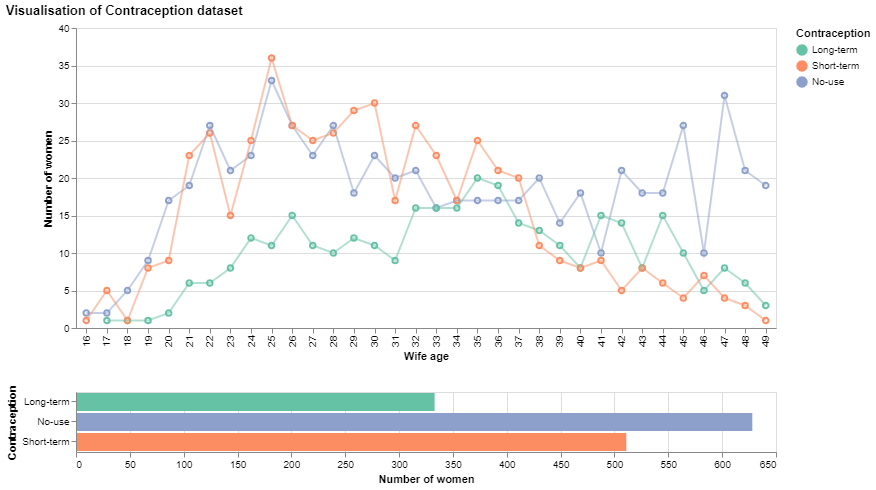

In [3]:
#Create visualisation

scale = alt.Scale(domain=['Long-term', 'Short-term', 'No-use'],range=['#66c2a5', '#fc8d62', '#8da0cb'])
color = alt.Color('Contraception:N', scale=scale)

brush = alt.selection_interval(encodings=['x'])
click = alt.selection_multi(encodings=['color'])

top_points = alt.Chart().mark_point(opacity=1).encode(
    alt.X('Wife age:O'),
    alt.Y('count(Contraception):Q', title='Number of women'),
    color= alt.condition(brush, color, alt.value('lightgray'))
).properties(
    width=700,
    height=300
).add_selection(
    brush
).transform_filter(click)

top_lines = alt.Chart().mark_line(opacity=0.5).encode(
    alt.X('Wife age:O'),
    alt.Y('count(Contraception):Q'),
    color= alt.condition(brush, color, alt.value('lightgray'))
).transform_filter(click)

bottom_hist = alt.Chart().mark_bar().encode(
    alt.X('count()', title='Number of women'),
    alt.Y('Contraception:O'),
    color=alt.condition(click, color, alt.value('lightgray'))
).transform_filter(
    brush
).properties(
    width=700,
).add_selection(click)

daveVisualisation = alt.vconcat( top_points + top_lines, bottom_hist, data=df, title="Visualisation of Contraception dataset")
daveVisualisation